In [1]:
%matplotlib inline
import d2lzh as d2l
import mxnet as mx
from mxnet import autograd, gluon, image, init, nd
from mxnet.gluon import data as gdata, loss as gloss, utils as gutils
import sys
import time

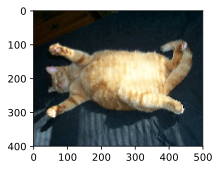

In [3]:
d2l.set_figsize()
img = image.imread('../img/cat1.jpg')
d2l.plt.imshow(img.asnumpy())

In [4]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range (num_cols):
            axes[i][j].imshow(imgs[i * num_cols +j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [8]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

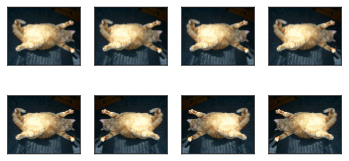

In [9]:
apply(img, gdata.vision.transforms.RandomFlipLeftRight())

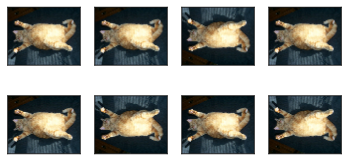

In [10]:
apply(img, gdata.vision.transforms.RandomFlipTopBottom())

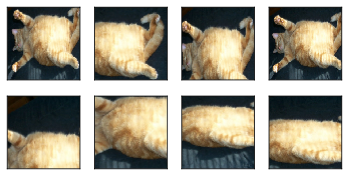

In [11]:
shape_aug = gdata.vision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

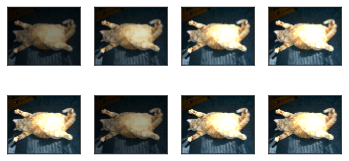

In [12]:
apply(img, gdata.vision.transforms.RandomBrightness(0.5))

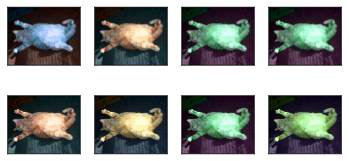

In [13]:
apply(img, gdata.vision.transforms.RandomHue(0.5))

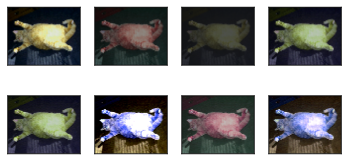

In [14]:
color_aug = gdata.vision.transforms.RandomColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

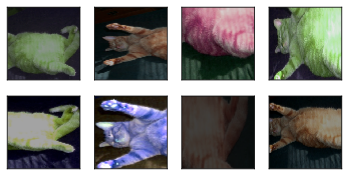

In [16]:
augs = gdata.vision.transforms.Compose([color_aug, shape_aug])
apply(img, augs)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aa813f208>,
      dtype=object)

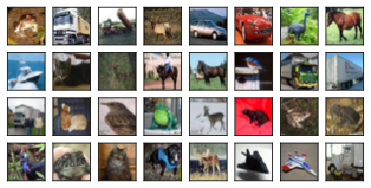

In [18]:
show_images(gdata.vision.CIFAR10(train=True)[0:32][0], 4, 8, scale=0.8)

In [20]:
flip_aug = gdata.vision.transforms.Compose([
    gdata.vision.transforms.RandomFlipLeftRight(),
    gdata.vision.transforms.ToTensor()])
no_aug = gdata.vision.transforms.Compose([
    gdata.vision.transforms.ToTensor()])